In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
import os
directory = "/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year"
ori_name = os.listdir(directory)

In [4]:
stocks = [directory +'/' + s for s in ori_name]
stocks

['/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/BABA (1).csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/VNM (1).csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/TSLA (1).csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/AMZN.csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/AAPL.csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/META (3).csv',
 '/content/drive/MyDrive/Đồ án biểu diễn (Dự báo giá chứng khoán)/dataset/1year/GOOG.csv']

In [5]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [6]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

<ipython-input-6-a6c4f3fbd729>:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]


,Close_x,Close_y,Close_x,Close_y,Close_x,Close_y,Close
0,111.959999,20.370001,338.323334,169.489502,161.839996,306.839996,142.520493
1,123.599998,20.010000,336.336670,171.368500,165.320007,317.869995,143.796494
2,125.540001,20.510000,350.583344,176.164505,171.179993,322.809998,148.036499
3,125.080002,20.700001,356.320007,176.158005,175.080002,330.559998,148.720505
4,123.910004,20.850000,334.600006,174.171005,174.559998,329.820007,148.106003


In [7]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
volatilities = returns.std()

In [8]:
mean_daily_returns * 252

Close_x    0.052988
Close_y   -0.432433
Close_x   -0.342973
Close_y   -0.467528
Close_x   -0.027712
Close_y   -0.698584
Close     -0.274097
dtype: float64

In [9]:
volatilities * 252

Close_x    12.036923
Close_y     3.918005
Close_x    10.297084
Close_y     7.865215
Close_x     5.668900
Close_y    10.101477
Close       6.080961
dtype: float64

In [10]:
np.array(mean_daily_returns * 252)

array([ 0.05298793, -0.43243298, -0.3429729 , -0.46752841, -0.02771168,
       -0.69858423, -0.27409745])

In [11]:
combine = pd.DataFrame({'Name stock': np.array(ori_name),
                       'returns': np.array(mean_daily_returns * 252),
                       'volatility': np.array(volatilities * 252)})

In [12]:
combine

,Name stock,returns,volatility
0,BABA (1).csv,0.052988,12.036923
1,VNM (1).csv,-0.432433,3.918005
2,TSLA (1).csv,-0.342973,10.297084
3,AMZN.csv,-0.467528,7.865215
4,AAPL.csv,-0.027712,5.668900
5,META (3).csv,-0.698584,10.101477
6,GOOG.csv,-0.274097,6.080961


In [13]:
ori_name[0].replace('.csv','')

'BABA (1)'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


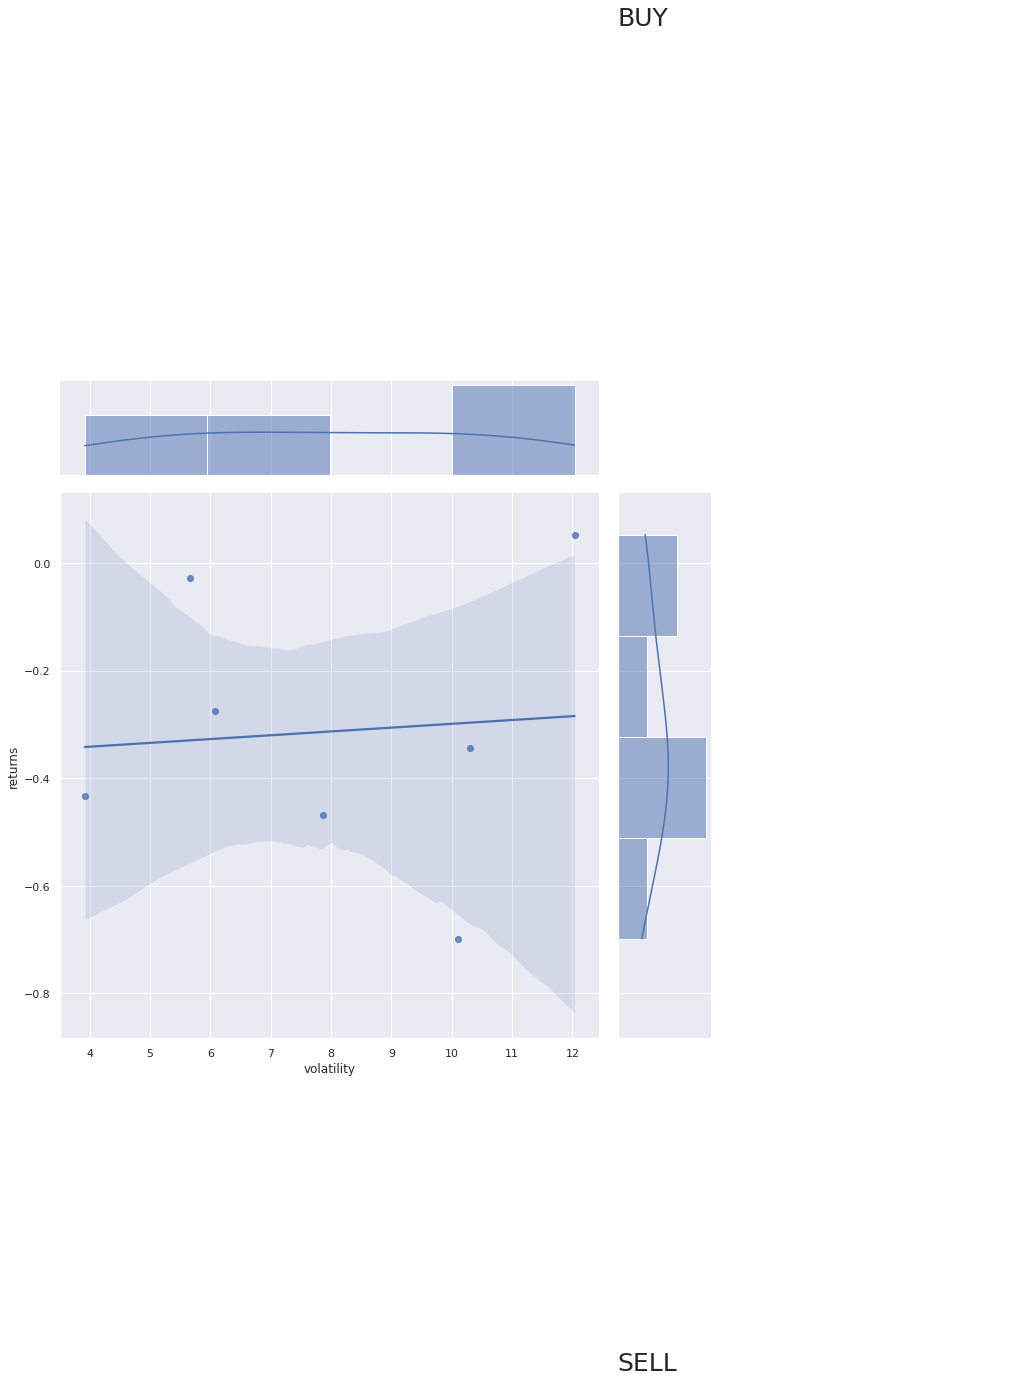

In [14]:
g = sns.jointplot("volatility", "returns", data=combine, kind="reg",height=10)

for i in range(combine.shape[0]):
    plt.annotate(ori_name[i].replace('.csv',''), (combine.iloc[i, 2], combine.iloc[i, 1]))
    
plt.text(0, -1.5, 'SELL', fontsize=25)
plt.text(0, 1.0, 'BUY', fontsize=25)
    
plt.show()